## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import statsModel
import scrapbook as sb 
import torch 
import statsModel
import baselineModels
import bostonDataset
import dataset 
from torch.utils.data import random_split 
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_error 

## Import Dataset 


In [3]:
n_features = 13
n_samples= 506
n_target = 1 
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [4]:
# Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Stats Model 



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.740
Model:                            OLS   Adj. R-squared (uncentered):              0.731
Method:                 Least Squares   F-statistic:                              85.38
Date:                Thu, 21 Jul 2022   Prob (F-statistic):                   1.80e-105
Time:                        15:54:04   Log-Likelihood:                         -312.33
No. Observations:                 404   AIC:                                      650.7
Df Residuals:                     391   BIC:                                      702.7
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

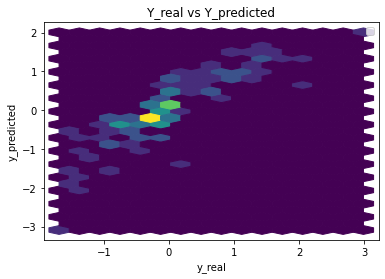

Performance Metrics
Mean Squared Error: 0.21510452175306885
Mean Absolute Error: 0.33584522374333214
Manhattan distance: 34.25621282181988
Euclidean distance: 4.684085953397208


Stats Model MAE 0.33584522374333214


In [5]:
coefficients , y_pred =statsModel.statsModel(X_train,y_train,X_test,y_test)
#Store MSE Value 
sb.glue("Coefficients",coefficients)
mae = mean_absolute_error(y_pred, y_test)
print("Stats Model MAE", mae)

# Catboost Model 

In [6]:
mae_cb = baselineModels.catboost(X_train,y_train,X_test,y_test)
#Store MSE Value
sb.glue("Catboost MAE",mae_cb)
print("Catboost MAE",mae_cb)

Learning rate set to 0.03548
0:	learn: 1.0068925	total: 62.8ms	remaining: 1m 2s
1:	learn: 0.9873128	total: 65.8ms	remaining: 32.9s
2:	learn: 0.9654968	total: 68.2ms	remaining: 22.7s
3:	learn: 0.9478178	total: 69.9ms	remaining: 17.4s
4:	learn: 0.9293565	total: 71.4ms	remaining: 14.2s
5:	learn: 0.9149650	total: 72.8ms	remaining: 12.1s
6:	learn: 0.8974280	total: 76.5ms	remaining: 10.9s
7:	learn: 0.8805648	total: 79.1ms	remaining: 9.8s
8:	learn: 0.8637181	total: 81.6ms	remaining: 8.98s
9:	learn: 0.8462958	total: 85.2ms	remaining: 8.43s
10:	learn: 0.8312984	total: 89.1ms	remaining: 8.01s
11:	learn: 0.8170172	total: 93.5ms	remaining: 7.7s


12:	learn: 0.8011434	total: 96.3ms	remaining: 7.31s
13:	learn: 0.7856039	total: 99ms	remaining: 6.97s
14:	learn: 0.7725689	total: 101ms	remaining: 6.61s
15:	learn: 0.7574396	total: 102ms	remaining: 6.29s
16:	learn: 0.7435780	total: 104ms	remaining: 6s
17:	learn: 0.7301455	total: 105ms	remaining: 5.75s
18:	learn: 0.7175366	total: 107ms	remaining: 5.53s
19:	learn: 0.7026053	total: 109ms	remaining: 5.33s
20:	learn: 0.6882835	total: 110ms	remaining: 5.14s
21:	learn: 0.6780860	total: 112ms	remaining: 4.98s
22:	learn: 0.6668939	total: 115ms	remaining: 4.87s


23:	learn: 0.6571212	total: 117ms	remaining: 4.77s
24:	learn: 0.6474505	total: 120ms	remaining: 4.68s
25:	learn: 0.6378421	total: 122ms	remaining: 4.57s
26:	learn: 0.6286974	total: 124ms	remaining: 4.45s
27:	learn: 0.6201701	total: 125ms	remaining: 4.34s
28:	learn: 0.6114713	total: 126ms	remaining: 4.23s
29:	learn: 0.6017544	total: 128ms	remaining: 4.13s
30:	learn: 0.5906903	total: 129ms	remaining: 4.04s
31:	learn: 0.5818424	total: 131ms	remaining: 3.96s
32:	learn: 0.5747808	total: 132ms	remaining: 3.88s
33:	learn: 0.5676916	total: 134ms	remaining: 3.8s
34:	learn: 0.5599114	total: 135ms	remaining: 3.73s
35:	learn: 0.5527723	total: 137ms	remaining: 3.66s
36:	learn: 0.5458196	total: 138ms	remaining: 3.6s
37:	learn: 0.5378508	total: 140ms	remaining: 3.53s
38:	learn: 0.5304659	total: 141ms	remaining: 3.47s
39:	learn: 0.5228983	total: 142ms	remaining: 3.41s
40:	learn: 0.5166179	total: 144ms	remaining: 3.36s
41:	learn: 0.5089703	total: 145ms	remaining: 3.3s
42:	learn: 0.5047185	total: 145ms	

47:	learn: 0.4775822	total: 153ms	remaining: 3.04s
48:	learn: 0.4724249	total: 155ms	remaining: 3.01s
49:	learn: 0.4650391	total: 157ms	remaining: 2.98s
50:	learn: 0.4601972	total: 158ms	remaining: 2.94s
51:	learn: 0.4548024	total: 160ms	remaining: 2.91s
52:	learn: 0.4504572	total: 161ms	remaining: 2.88s
53:	learn: 0.4460669	total: 162ms	remaining: 2.84s
54:	learn: 0.4407300	total: 163ms	remaining: 2.81s
55:	learn: 0.4358113	total: 165ms	remaining: 2.78s
56:	learn: 0.4308704	total: 166ms	remaining: 2.75s
57:	learn: 0.4266283	total: 167ms	remaining: 2.72s
58:	learn: 0.4233227	total: 169ms	remaining: 2.69s
59:	learn: 0.4188065	total: 170ms	remaining: 2.67s
60:	learn: 0.4146001	total: 172ms	remaining: 2.64s
61:	learn: 0.4112948	total: 173ms	remaining: 2.62s
62:	learn: 0.4073992	total: 174ms	remaining: 2.59s
63:	learn: 0.4041431	total: 176ms	remaining: 2.57s
64:	learn: 0.3997957	total: 177ms	remaining: 2.55s
65:	learn: 0.3960112	total: 178ms	remaining: 2.52s
66:	learn: 0.3925379	total: 180

129:	learn: 0.2717235	total: 270ms	remaining: 1.81s
130:	learn: 0.2707447	total: 274ms	remaining: 1.81s
131:	learn: 0.2696284	total: 275ms	remaining: 1.81s
132:	learn: 0.2686417	total: 276ms	remaining: 1.8s
133:	learn: 0.2675477	total: 278ms	remaining: 1.79s
134:	learn: 0.2665456	total: 279ms	remaining: 1.79s
135:	learn: 0.2653939	total: 280ms	remaining: 1.78s
136:	learn: 0.2646420	total: 284ms	remaining: 1.79s
137:	learn: 0.2637701	total: 286ms	remaining: 1.78s
138:	learn: 0.2627358	total: 287ms	remaining: 1.78s
139:	learn: 0.2619275	total: 288ms	remaining: 1.77s
140:	learn: 0.2611764	total: 290ms	remaining: 1.76s


141:	learn: 0.2604334	total: 291ms	remaining: 1.76s
142:	learn: 0.2592036	total: 293ms	remaining: 1.75s
143:	learn: 0.2583021	total: 295ms	remaining: 1.75s
144:	learn: 0.2570639	total: 298ms	remaining: 1.75s
145:	learn: 0.2563212	total: 300ms	remaining: 1.75s
146:	learn: 0.2556660	total: 302ms	remaining: 1.75s
147:	learn: 0.2548410	total: 305ms	remaining: 1.75s
148:	learn: 0.2537563	total: 307ms	remaining: 1.75s
149:	learn: 0.2528423	total: 309ms	remaining: 1.75s
150:	learn: 0.2520717	total: 314ms	remaining: 1.76s
151:	learn: 0.2512956	total: 316ms	remaining: 1.76s
152:	learn: 0.2504420	total: 318ms	remaining: 1.76s
153:	learn: 0.2500214	total: 320ms	remaining: 1.75s
154:	learn: 0.2493801	total: 321ms	remaining: 1.75s
155:	learn: 0.2485519	total: 323ms	remaining: 1.75s
156:	learn: 0.2478578	total: 326ms	remaining: 1.75s


157:	learn: 0.2469774	total: 328ms	remaining: 1.75s
158:	learn: 0.2458690	total: 330ms	remaining: 1.75s
159:	learn: 0.2450837	total: 331ms	remaining: 1.74s
160:	learn: 0.2439747	total: 333ms	remaining: 1.73s
161:	learn: 0.2432241	total: 335ms	remaining: 1.73s
162:	learn: 0.2421770	total: 337ms	remaining: 1.73s
163:	learn: 0.2417216	total: 338ms	remaining: 1.72s
164:	learn: 0.2409787	total: 340ms	remaining: 1.72s
165:	learn: 0.2402598	total: 341ms	remaining: 1.71s
166:	learn: 0.2396587	total: 343ms	remaining: 1.71s
167:	learn: 0.2385235	total: 344ms	remaining: 1.7s
168:	learn: 0.2378926	total: 346ms	remaining: 1.7s
169:	learn: 0.2371362	total: 347ms	remaining: 1.7s
170:	learn: 0.2365308	total: 349ms	remaining: 1.69s
171:	learn: 0.2359252	total: 351ms	remaining: 1.69s
172:	learn: 0.2351597	total: 352ms	remaining: 1.68s
173:	learn: 0.2344250	total: 354ms	remaining: 1.68s
174:	learn: 0.2339044	total: 355ms	remaining: 1.67s
175:	learn: 0.2329559	total: 357ms	remaining: 1.67s
176:	learn: 0.2

230:	learn: 0.1982621	total: 451ms	remaining: 1.5s
231:	learn: 0.1978540	total: 453ms	remaining: 1.5s
232:	learn: 0.1970796	total: 455ms	remaining: 1.5s
233:	learn: 0.1964653	total: 465ms	remaining: 1.52s
234:	learn: 0.1961193	total: 468ms	remaining: 1.52s


235:	learn: 0.1958990	total: 470ms	remaining: 1.52s
236:	learn: 0.1952939	total: 472ms	remaining: 1.52s
237:	learn: 0.1950226	total: 477ms	remaining: 1.53s
238:	learn: 0.1945421	total: 479ms	remaining: 1.52s
239:	learn: 0.1939640	total: 481ms	remaining: 1.52s
240:	learn: 0.1934355	total: 484ms	remaining: 1.52s
241:	learn: 0.1931767	total: 486ms	remaining: 1.52s
242:	learn: 0.1925851	total: 488ms	remaining: 1.52s
243:	learn: 0.1920162	total: 491ms	remaining: 1.52s
244:	learn: 0.1917309	total: 494ms	remaining: 1.52s
245:	learn: 0.1912627	total: 496ms	remaining: 1.52s
246:	learn: 0.1908512	total: 499ms	remaining: 1.52s
247:	learn: 0.1901960	total: 500ms	remaining: 1.52s
248:	learn: 0.1896201	total: 502ms	remaining: 1.51s
249:	learn: 0.1891106	total: 503ms	remaining: 1.51s


250:	learn: 0.1883433	total: 505ms	remaining: 1.51s
251:	learn: 0.1878809	total: 507ms	remaining: 1.51s
252:	learn: 0.1872520	total: 509ms	remaining: 1.5s
253:	learn: 0.1866665	total: 510ms	remaining: 1.5s
254:	learn: 0.1863674	total: 512ms	remaining: 1.5s
255:	learn: 0.1861101	total: 513ms	remaining: 1.49s
256:	learn: 0.1855854	total: 515ms	remaining: 1.49s
257:	learn: 0.1853197	total: 516ms	remaining: 1.48s
258:	learn: 0.1849235	total: 518ms	remaining: 1.48s
259:	learn: 0.1844761	total: 519ms	remaining: 1.48s
260:	learn: 0.1837928	total: 520ms	remaining: 1.47s
261:	learn: 0.1832968	total: 523ms	remaining: 1.47s
262:	learn: 0.1830497	total: 525ms	remaining: 1.47s
263:	learn: 0.1824430	total: 528ms	remaining: 1.47s
264:	learn: 0.1820769	total: 533ms	remaining: 1.48s
265:	learn: 0.1816725	total: 535ms	remaining: 1.48s
266:	learn: 0.1813604	total: 542ms	remaining: 1.49s
267:	learn: 0.1808392	total: 545ms	remaining: 1.49s
268:	learn: 0.1806569	total: 548ms	remaining: 1.49s
269:	learn: 0.1

282:	learn: 0.1743812	total: 639ms	remaining: 1.62s
283:	learn: 0.1739028	total: 653ms	remaining: 1.65s


284:	learn: 0.1734684	total: 656ms	remaining: 1.65s
285:	learn: 0.1730500	total: 659ms	remaining: 1.65s
286:	learn: 0.1725354	total: 662ms	remaining: 1.64s
287:	learn: 0.1722134	total: 666ms	remaining: 1.65s
288:	learn: 0.1718547	total: 670ms	remaining: 1.65s


289:	learn: 0.1714447	total: 678ms	remaining: 1.66s
290:	learn: 0.1710391	total: 680ms	remaining: 1.66s
291:	learn: 0.1707887	total: 683ms	remaining: 1.66s
292:	learn: 0.1703016	total: 685ms	remaining: 1.65s
293:	learn: 0.1699244	total: 690ms	remaining: 1.66s
294:	learn: 0.1693614	total: 693ms	remaining: 1.66s
295:	learn: 0.1688658	total: 695ms	remaining: 1.65s
296:	learn: 0.1684598	total: 698ms	remaining: 1.65s
297:	learn: 0.1682726	total: 701ms	remaining: 1.65s
298:	learn: 0.1678571	total: 703ms	remaining: 1.65s
299:	learn: 0.1675264	total: 706ms	remaining: 1.65s
300:	learn: 0.1670325	total: 708ms	remaining: 1.64s
301:	learn: 0.1665775	total: 710ms	remaining: 1.64s
302:	learn: 0.1662645	total: 712ms	remaining: 1.64s
303:	learn: 0.1659239	total: 725ms	remaining: 1.66s
304:	learn: 0.1654445	total: 729ms	remaining: 1.66s
305:	learn: 0.1650395	total: 732ms	remaining: 1.66s
306:	learn: 0.1648289	total: 735ms	remaining: 1.66s
307:	learn: 0.1646978	total: 737ms	remaining: 1.66s
308:	learn: 

325:	learn: 0.1581274	total: 791ms	remaining: 1.63s
326:	learn: 0.1576976	total: 793ms	remaining: 1.63s
327:	learn: 0.1573368	total: 796ms	remaining: 1.63s
328:	learn: 0.1569873	total: 798ms	remaining: 1.63s
329:	learn: 0.1565187	total: 801ms	remaining: 1.63s
330:	learn: 0.1561684	total: 804ms	remaining: 1.62s
331:	learn: 0.1559649	total: 806ms	remaining: 1.62s
332:	learn: 0.1556391	total: 808ms	remaining: 1.62s
333:	learn: 0.1552822	total: 811ms	remaining: 1.62s
334:	learn: 0.1551615	total: 813ms	remaining: 1.61s


335:	learn: 0.1550264	total: 816ms	remaining: 1.61s
336:	learn: 0.1545638	total: 818ms	remaining: 1.61s
337:	learn: 0.1540766	total: 820ms	remaining: 1.61s
338:	learn: 0.1539418	total: 823ms	remaining: 1.6s
339:	learn: 0.1537552	total: 825ms	remaining: 1.6s
340:	learn: 0.1533119	total: 828ms	remaining: 1.6s
341:	learn: 0.1529423	total: 831ms	remaining: 1.6s
342:	learn: 0.1528242	total: 834ms	remaining: 1.6s


343:	learn: 0.1524100	total: 839ms	remaining: 1.6s
344:	learn: 0.1522883	total: 841ms	remaining: 1.6s
345:	learn: 0.1518395	total: 844ms	remaining: 1.6s
346:	learn: 0.1514020	total: 847ms	remaining: 1.59s
347:	learn: 0.1512095	total: 850ms	remaining: 1.59s
348:	learn: 0.1510913	total: 852ms	remaining: 1.59s
349:	learn: 0.1507573	total: 855ms	remaining: 1.59s
350:	learn: 0.1504799	total: 859ms	remaining: 1.59s
351:	learn: 0.1503841	total: 863ms	remaining: 1.59s
352:	learn: 0.1499391	total: 869ms	remaining: 1.59s
353:	learn: 0.1495104	total: 872ms	remaining: 1.59s
354:	learn: 0.1492896	total: 874ms	remaining: 1.59s
355:	learn: 0.1490359	total: 877ms	remaining: 1.58s
356:	learn: 0.1487967	total: 879ms	remaining: 1.58s
357:	learn: 0.1483550	total: 882ms	remaining: 1.58s
358:	learn: 0.1480547	total: 885ms	remaining: 1.58s
359:	learn: 0.1476720	total: 887ms	remaining: 1.58s
360:	learn: 0.1473063	total: 889ms	remaining: 1.57s
361:	learn: 0.1470111	total: 893ms	remaining: 1.57s
362:	learn: 0.1

378:	learn: 0.1420500	total: 946ms	remaining: 1.55s


379:	learn: 0.1418113	total: 966ms	remaining: 1.58s
380:	learn: 0.1416107	total: 969ms	remaining: 1.57s


381:	learn: 0.1413129	total: 973ms	remaining: 1.57s
382:	learn: 0.1409207	total: 977ms	remaining: 1.57s
383:	learn: 0.1406794	total: 980ms	remaining: 1.57s
384:	learn: 0.1402847	total: 983ms	remaining: 1.57s
385:	learn: 0.1400570	total: 985ms	remaining: 1.57s
386:	learn: 0.1397924	total: 987ms	remaining: 1.56s
387:	learn: 0.1394233	total: 990ms	remaining: 1.56s
388:	learn: 0.1391628	total: 993ms	remaining: 1.56s
389:	learn: 0.1387524	total: 1s	remaining: 1.57s
390:	learn: 0.1384180	total: 1.01s	remaining: 1.57s
391:	learn: 0.1382418	total: 1.01s	remaining: 1.57s
392:	learn: 0.1379878	total: 1.02s	remaining: 1.57s
393:	learn: 0.1376637	total: 1.02s	remaining: 1.57s
394:	learn: 0.1372322	total: 1.02s	remaining: 1.56s
395:	learn: 0.1369330	total: 1.02s	remaining: 1.56s
396:	learn: 0.1368667	total: 1.03s	remaining: 1.56s
397:	learn: 0.1364538	total: 1.03s	remaining: 1.56s
398:	learn: 0.1361256	total: 1.03s	remaining: 1.55s
399:	learn: 0.1358419	total: 1.03s	remaining: 1.55s
400:	learn: 0.1

412:	learn: 0.1321011	total: 1.08s	remaining: 1.54s
413:	learn: 0.1318075	total: 1.1s	remaining: 1.55s
414:	learn: 0.1315769	total: 1.1s	remaining: 1.55s


415:	learn: 0.1312966	total: 1.1s	remaining: 1.55s
416:	learn: 0.1310142	total: 1.1s	remaining: 1.54s
417:	learn: 0.1308699	total: 1.11s	remaining: 1.54s
418:	learn: 0.1305669	total: 1.11s	remaining: 1.54s
419:	learn: 0.1303652	total: 1.11s	remaining: 1.54s
420:	learn: 0.1300882	total: 1.12s	remaining: 1.54s
421:	learn: 0.1297040	total: 1.12s	remaining: 1.54s
422:	learn: 0.1295297	total: 1.12s	remaining: 1.53s
423:	learn: 0.1292519	total: 1.13s	remaining: 1.53s
424:	learn: 0.1290511	total: 1.13s	remaining: 1.53s
425:	learn: 0.1287695	total: 1.13s	remaining: 1.53s
426:	learn: 0.1284804	total: 1.14s	remaining: 1.53s
427:	learn: 0.1284228	total: 1.15s	remaining: 1.54s
428:	learn: 0.1281764	total: 1.15s	remaining: 1.53s
429:	learn: 0.1279579	total: 1.16s	remaining: 1.53s
430:	learn: 0.1278335	total: 1.16s	remaining: 1.53s
431:	learn: 0.1275588	total: 1.17s	remaining: 1.53s


432:	learn: 0.1274415	total: 1.18s	remaining: 1.54s
433:	learn: 0.1271722	total: 1.18s	remaining: 1.54s
434:	learn: 0.1269601	total: 1.19s	remaining: 1.54s


435:	learn: 0.1266712	total: 1.2s	remaining: 1.55s
436:	learn: 0.1264713	total: 1.2s	remaining: 1.55s
437:	learn: 0.1262154	total: 1.21s	remaining: 1.55s
438:	learn: 0.1258654	total: 1.22s	remaining: 1.56s
439:	learn: 0.1255990	total: 1.22s	remaining: 1.55s
440:	learn: 0.1253904	total: 1.22s	remaining: 1.55s
441:	learn: 0.1251906	total: 1.23s	remaining: 1.55s
442:	learn: 0.1250358	total: 1.24s	remaining: 1.55s
443:	learn: 0.1247549	total: 1.24s	remaining: 1.55s
444:	learn: 0.1244895	total: 1.27s	remaining: 1.58s
445:	learn: 0.1243740	total: 1.27s	remaining: 1.58s
446:	learn: 0.1242034	total: 1.28s	remaining: 1.58s
447:	learn: 0.1239597	total: 1.3s	remaining: 1.6s
448:	learn: 0.1236725	total: 1.31s	remaining: 1.61s
449:	learn: 0.1233640	total: 1.31s	remaining: 1.61s
450:	learn: 0.1231791	total: 1.31s	remaining: 1.6s


451:	learn: 0.1230351	total: 1.33s	remaining: 1.61s
452:	learn: 0.1228974	total: 1.33s	remaining: 1.61s
453:	learn: 0.1226238	total: 1.34s	remaining: 1.61s
454:	learn: 0.1222971	total: 1.34s	remaining: 1.61s


455:	learn: 0.1220673	total: 1.35s	remaining: 1.61s
456:	learn: 0.1217977	total: 1.35s	remaining: 1.61s
457:	learn: 0.1215751	total: 1.37s	remaining: 1.62s
458:	learn: 0.1214125	total: 1.37s	remaining: 1.62s
459:	learn: 0.1211204	total: 1.38s	remaining: 1.62s
460:	learn: 0.1208260	total: 1.38s	remaining: 1.61s
461:	learn: 0.1205901	total: 1.38s	remaining: 1.61s
462:	learn: 0.1204148	total: 1.39s	remaining: 1.61s
463:	learn: 0.1202232	total: 1.4s	remaining: 1.62s
464:	learn: 0.1200156	total: 1.45s	remaining: 1.67s


465:	learn: 0.1197962	total: 1.47s	remaining: 1.68s


466:	learn: 0.1195083	total: 1.49s	remaining: 1.71s
467:	learn: 0.1192671	total: 1.5s	remaining: 1.71s
468:	learn: 0.1190242	total: 1.5s	remaining: 1.71s
469:	learn: 0.1188468	total: 1.51s	remaining: 1.7s
470:	learn: 0.1187144	total: 1.52s	remaining: 1.7s
471:	learn: 0.1184632	total: 1.52s	remaining: 1.7s
472:	learn: 0.1181918	total: 1.52s	remaining: 1.7s
473:	learn: 0.1180684	total: 1.54s	remaining: 1.71s


474:	learn: 0.1177299	total: 1.57s	remaining: 1.73s


475:	learn: 0.1175041	total: 1.57s	remaining: 1.73s
476:	learn: 0.1172345	total: 1.57s	remaining: 1.73s
477:	learn: 0.1169692	total: 1.58s	remaining: 1.72s
478:	learn: 0.1166819	total: 1.58s	remaining: 1.72s
479:	learn: 0.1163349	total: 1.58s	remaining: 1.71s
480:	learn: 0.1160750	total: 1.58s	remaining: 1.71s
481:	learn: 0.1157595	total: 1.59s	remaining: 1.71s
482:	learn: 0.1156864	total: 1.59s	remaining: 1.71s
483:	learn: 0.1154229	total: 1.59s	remaining: 1.7s
484:	learn: 0.1152889	total: 1.6s	remaining: 1.7s
485:	learn: 0.1151998	total: 1.6s	remaining: 1.7s
486:	learn: 0.1150765	total: 1.6s	remaining: 1.69s
487:	learn: 0.1149915	total: 1.61s	remaining: 1.69s
488:	learn: 0.1147594	total: 1.61s	remaining: 1.69s
489:	learn: 0.1145575	total: 1.62s	remaining: 1.68s
490:	learn: 0.1143902	total: 1.62s	remaining: 1.68s
491:	learn: 0.1143227	total: 1.62s	remaining: 1.67s
492:	learn: 0.1140993	total: 1.62s	remaining: 1.67s
493:	learn: 0.1138596	total: 1.63s	remaining: 1.67s
494:	learn: 0.1137

497:	learn: 0.1130905	total: 1.65s	remaining: 1.67s
498:	learn: 0.1128674	total: 1.66s	remaining: 1.67s
499:	learn: 0.1125707	total: 1.67s	remaining: 1.67s
500:	learn: 0.1125164	total: 1.69s	remaining: 1.69s
501:	learn: 0.1122887	total: 1.7s	remaining: 1.69s
502:	learn: 0.1122040	total: 1.71s	remaining: 1.69s
503:	learn: 0.1120705	total: 1.71s	remaining: 1.69s
504:	learn: 0.1119147	total: 1.72s	remaining: 1.69s


505:	learn: 0.1117729	total: 1.73s	remaining: 1.69s
506:	learn: 0.1116539	total: 1.74s	remaining: 1.69s
507:	learn: 0.1114863	total: 1.75s	remaining: 1.7s
508:	learn: 0.1112419	total: 1.77s	remaining: 1.7s
509:	learn: 0.1110149	total: 1.83s	remaining: 1.75s
510:	learn: 0.1109198	total: 1.83s	remaining: 1.75s
511:	learn: 0.1107195	total: 1.84s	remaining: 1.75s
512:	learn: 0.1106445	total: 1.84s	remaining: 1.75s
513:	learn: 0.1105383	total: 1.85s	remaining: 1.75s
514:	learn: 0.1103475	total: 1.85s	remaining: 1.74s
515:	learn: 0.1101835	total: 1.85s	remaining: 1.74s
516:	learn: 0.1100252	total: 1.86s	remaining: 1.74s
517:	learn: 0.1098779	total: 1.86s	remaining: 1.73s
518:	learn: 0.1096778	total: 1.86s	remaining: 1.73s
519:	learn: 0.1095449	total: 1.87s	remaining: 1.73s
520:	learn: 0.1092852	total: 1.87s	remaining: 1.72s
521:	learn: 0.1091457	total: 1.88s	remaining: 1.72s
522:	learn: 0.1090421	total: 1.88s	remaining: 1.71s
523:	learn: 0.1087457	total: 1.88s	remaining: 1.71s
524:	learn: 0.

529:	learn: 0.1076778	total: 1.91s	remaining: 1.69s
530:	learn: 0.1075079	total: 1.91s	remaining: 1.69s
531:	learn: 0.1073236	total: 1.92s	remaining: 1.69s
532:	learn: 0.1071257	total: 1.92s	remaining: 1.68s
533:	learn: 0.1069193	total: 1.92s	remaining: 1.68s
534:	learn: 0.1066634	total: 1.92s	remaining: 1.67s
535:	learn: 0.1065118	total: 1.93s	remaining: 1.67s
536:	learn: 0.1062131	total: 1.93s	remaining: 1.66s
537:	learn: 0.1059211	total: 1.93s	remaining: 1.66s
538:	learn: 0.1056850	total: 1.94s	remaining: 1.66s
539:	learn: 0.1056071	total: 1.94s	remaining: 1.65s
540:	learn: 0.1053084	total: 1.95s	remaining: 1.65s
541:	learn: 0.1050530	total: 1.95s	remaining: 1.65s
542:	learn: 0.1050078	total: 1.95s	remaining: 1.64s
543:	learn: 0.1048558	total: 1.96s	remaining: 1.64s
544:	learn: 0.1046251	total: 1.96s	remaining: 1.63s
545:	learn: 0.1043540	total: 1.96s	remaining: 1.63s
546:	learn: 0.1041790	total: 1.96s	remaining: 1.63s
547:	learn: 0.1039509	total: 1.97s	remaining: 1.62s
548:	learn: 

575:	learn: 0.0992137	total: 2.08s	remaining: 1.53s
576:	learn: 0.0990999	total: 2.08s	remaining: 1.52s
577:	learn: 0.0989753	total: 2.08s	remaining: 1.52s
578:	learn: 0.0988153	total: 2.09s	remaining: 1.52s
579:	learn: 0.0986527	total: 2.1s	remaining: 1.52s
580:	learn: 0.0985655	total: 2.1s	remaining: 1.51s
581:	learn: 0.0983437	total: 2.1s	remaining: 1.51s
582:	learn: 0.0981249	total: 2.1s	remaining: 1.51s
583:	learn: 0.0979844	total: 2.11s	remaining: 1.5s
584:	learn: 0.0976817	total: 2.12s	remaining: 1.5s
585:	learn: 0.0975246	total: 2.12s	remaining: 1.5s
586:	learn: 0.0973784	total: 2.13s	remaining: 1.5s
587:	learn: 0.0971639	total: 2.13s	remaining: 1.5s
588:	learn: 0.0970267	total: 2.14s	remaining: 1.49s
589:	learn: 0.0968153	total: 2.14s	remaining: 1.49s
590:	learn: 0.0966352	total: 2.14s	remaining: 1.48s
591:	learn: 0.0964176	total: 2.15s	remaining: 1.48s
592:	learn: 0.0961597	total: 2.15s	remaining: 1.47s
593:	learn: 0.0960372	total: 2.15s	remaining: 1.47s
594:	learn: 0.0958317

623:	learn: 0.0908832	total: 2.23s	remaining: 1.34s
624:	learn: 0.0907381	total: 2.23s	remaining: 1.34s
625:	learn: 0.0905851	total: 2.23s	remaining: 1.33s
626:	learn: 0.0903803	total: 2.24s	remaining: 1.33s
627:	learn: 0.0902439	total: 2.24s	remaining: 1.33s
628:	learn: 0.0901291	total: 2.24s	remaining: 1.32s
629:	learn: 0.0900123	total: 2.25s	remaining: 1.32s
630:	learn: 0.0899209	total: 2.26s	remaining: 1.32s
631:	learn: 0.0897934	total: 2.26s	remaining: 1.32s
632:	learn: 0.0896324	total: 2.27s	remaining: 1.32s
633:	learn: 0.0895049	total: 2.27s	remaining: 1.31s
634:	learn: 0.0894602	total: 2.27s	remaining: 1.31s
635:	learn: 0.0892502	total: 2.27s	remaining: 1.3s
636:	learn: 0.0889937	total: 2.28s	remaining: 1.3s
637:	learn: 0.0888866	total: 2.28s	remaining: 1.29s
638:	learn: 0.0886907	total: 2.28s	remaining: 1.29s
639:	learn: 0.0886301	total: 2.28s	remaining: 1.28s
640:	learn: 0.0884663	total: 2.28s	remaining: 1.28s
641:	learn: 0.0883574	total: 2.29s	remaining: 1.27s
642:	learn: 0.

683:	learn: 0.0822066	total: 2.37s	remaining: 1.1s
684:	learn: 0.0820032	total: 2.38s	remaining: 1.09s
685:	learn: 0.0819039	total: 2.38s	remaining: 1.09s
686:	learn: 0.0817949	total: 2.38s	remaining: 1.08s
687:	learn: 0.0816231	total: 2.38s	remaining: 1.08s
688:	learn: 0.0815235	total: 2.38s	remaining: 1.07s
689:	learn: 0.0814213	total: 2.38s	remaining: 1.07s
690:	learn: 0.0812819	total: 2.39s	remaining: 1.07s
691:	learn: 0.0811349	total: 2.39s	remaining: 1.06s
692:	learn: 0.0809951	total: 2.39s	remaining: 1.06s
693:	learn: 0.0808013	total: 2.4s	remaining: 1.06s
694:	learn: 0.0806582	total: 2.4s	remaining: 1.05s
695:	learn: 0.0805907	total: 2.43s	remaining: 1.06s
696:	learn: 0.0804292	total: 2.43s	remaining: 1.06s
697:	learn: 0.0802975	total: 2.44s	remaining: 1.05s


698:	learn: 0.0801901	total: 2.49s	remaining: 1.07s
699:	learn: 0.0800090	total: 2.5s	remaining: 1.07s
700:	learn: 0.0798321	total: 2.5s	remaining: 1.07s
701:	learn: 0.0796656	total: 2.51s	remaining: 1.06s
702:	learn: 0.0796247	total: 2.51s	remaining: 1.06s
703:	learn: 0.0794432	total: 2.51s	remaining: 1.06s
704:	learn: 0.0793421	total: 2.52s	remaining: 1.05s
705:	learn: 0.0791767	total: 2.52s	remaining: 1.05s
706:	learn: 0.0790302	total: 2.53s	remaining: 1.05s
707:	learn: 0.0789141	total: 2.53s	remaining: 1.04s
708:	learn: 0.0787634	total: 2.54s	remaining: 1.04s
709:	learn: 0.0786020	total: 2.54s	remaining: 1.04s
710:	learn: 0.0784411	total: 2.54s	remaining: 1.03s
711:	learn: 0.0782972	total: 2.54s	remaining: 1.03s
712:	learn: 0.0781353	total: 2.55s	remaining: 1.02s
713:	learn: 0.0779270	total: 2.55s	remaining: 1.02s
714:	learn: 0.0778244	total: 2.55s	remaining: 1.02s
715:	learn: 0.0776825	total: 2.56s	remaining: 1.01s
716:	learn: 0.0775733	total: 2.56s	remaining: 1.01s
717:	learn: 0.

760:	learn: 0.0723111	total: 2.65s	remaining: 833ms
761:	learn: 0.0721831	total: 2.65s	remaining: 829ms
762:	learn: 0.0720260	total: 2.65s	remaining: 825ms
763:	learn: 0.0718267	total: 2.66s	remaining: 821ms
764:	learn: 0.0717615	total: 2.66s	remaining: 817ms
765:	learn: 0.0716905	total: 2.66s	remaining: 813ms
766:	learn: 0.0715742	total: 2.67s	remaining: 811ms
767:	learn: 0.0714314	total: 2.67s	remaining: 807ms
768:	learn: 0.0713410	total: 2.67s	remaining: 803ms
769:	learn: 0.0712277	total: 2.67s	remaining: 799ms
770:	learn: 0.0711294	total: 2.67s	remaining: 795ms
771:	learn: 0.0710803	total: 2.68s	remaining: 791ms
772:	learn: 0.0709308	total: 2.68s	remaining: 787ms
773:	learn: 0.0708349	total: 2.68s	remaining: 783ms
774:	learn: 0.0706491	total: 2.68s	remaining: 779ms
775:	learn: 0.0705962	total: 2.68s	remaining: 775ms
776:	learn: 0.0704762	total: 2.69s	remaining: 771ms
777:	learn: 0.0703816	total: 2.69s	remaining: 767ms
778:	learn: 0.0703179	total: 2.69s	remaining: 763ms
779:	learn: 

858:	learn: 0.0626541	total: 2.83s	remaining: 465ms
859:	learn: 0.0625954	total: 2.83s	remaining: 461ms
860:	learn: 0.0624498	total: 2.84s	remaining: 458ms
861:	learn: 0.0623060	total: 2.84s	remaining: 455ms
862:	learn: 0.0622187	total: 2.84s	remaining: 452ms
863:	learn: 0.0621937	total: 2.85s	remaining: 448ms
864:	learn: 0.0620860	total: 2.85s	remaining: 445ms
865:	learn: 0.0620506	total: 2.85s	remaining: 441ms
866:	learn: 0.0619926	total: 2.86s	remaining: 438ms
867:	learn: 0.0619303	total: 2.86s	remaining: 435ms
868:	learn: 0.0618237	total: 2.86s	remaining: 431ms
869:	learn: 0.0616874	total: 2.86s	remaining: 428ms
870:	learn: 0.0616171	total: 2.87s	remaining: 424ms
871:	learn: 0.0615525	total: 2.87s	remaining: 421ms
872:	learn: 0.0614567	total: 2.87s	remaining: 418ms
873:	learn: 0.0613510	total: 2.87s	remaining: 414ms
874:	learn: 0.0613227	total: 2.87s	remaining: 411ms
875:	learn: 0.0612323	total: 2.88s	remaining: 407ms
876:	learn: 0.0611402	total: 2.88s	remaining: 404ms
877:	learn: 

929:	learn: 0.0571205	total: 2.99s	remaining: 225ms
930:	learn: 0.0569934	total: 2.99s	remaining: 222ms
931:	learn: 0.0569036	total: 3s	remaining: 219ms
932:	learn: 0.0568779	total: 3s	remaining: 215ms
933:	learn: 0.0568199	total: 3s	remaining: 212ms
934:	learn: 0.0567218	total: 3s	remaining: 209ms
935:	learn: 0.0566135	total: 3s	remaining: 205ms
936:	learn: 0.0564953	total: 3.01s	remaining: 202ms
937:	learn: 0.0563888	total: 3.01s	remaining: 199ms
938:	learn: 0.0562486	total: 3.02s	remaining: 196ms
939:	learn: 0.0561669	total: 3.02s	remaining: 193ms
940:	learn: 0.0560956	total: 3.03s	remaining: 190ms
941:	learn: 0.0560559	total: 3.03s	remaining: 187ms
942:	learn: 0.0560192	total: 3.03s	remaining: 183ms
943:	learn: 0.0559286	total: 3.03s	remaining: 180ms
944:	learn: 0.0558229	total: 3.04s	remaining: 177ms
945:	learn: 0.0556582	total: 3.04s	remaining: 174ms
946:	learn: 0.0556029	total: 3.04s	remaining: 170ms
947:	learn: 0.0555964	total: 3.05s	remaining: 167ms
948:	learn: 0.0555380	total

995:	learn: 0.0518990	total: 3.15s	remaining: 12.7ms
996:	learn: 0.0517560	total: 3.15s	remaining: 9.49ms
997:	learn: 0.0516319	total: 3.15s	remaining: 6.32ms
998:	learn: 0.0515830	total: 3.16s	remaining: 3.16ms
999:	learn: 0.0515215	total: 3.16s	remaining: 0us
Mean Absolute error 0.2044840952942296


Catboost MAE 0.2044840952942296


# TabNet Regressor

In [7]:
n_epochs = 1000
batch_size = 32

Device used : cpu


epoch 0  | loss: 2.48667 | train_mse: 1.56119 | train_mae: 0.80268 |  0:00:01s


epoch 1  | loss: 0.78385 | train_mse: 0.99979 | train_mae: 0.70424 |  0:00:02s


epoch 2  | loss: 0.60141 | train_mse: 0.67037 | train_mae: 0.55531 |  0:00:02s


epoch 3  | loss: 0.54299 | train_mse: 0.47658 | train_mae: 0.49206 |  0:00:03s


epoch 4  | loss: 0.45728 | train_mse: 0.35175 | train_mae: 0.42006 |  0:00:03s


epoch 5  | loss: 0.33515 | train_mse: 0.33605 | train_mae: 0.40888 |  0:00:03s


epoch 6  | loss: 0.38696 | train_mse: 0.31886 | train_mae: 0.39672 |  0:00:04s


epoch 7  | loss: 0.37727 | train_mse: 0.26255 | train_mae: 0.36121 |  0:00:04s


epoch 8  | loss: 0.38362 | train_mse: 0.23065 | train_mae: 0.34242 |  0:00:05s


epoch 9  | loss: 0.31591 | train_mse: 0.20902 | train_mae: 0.31065 |  0:00:05s


epoch 10 | loss: 0.37712 | train_mse: 0.26917 | train_mae: 0.35755 |  0:00:06s


epoch 11 | loss: 0.28567 | train_mse: 0.26491 | train_mae: 0.35431 |  0:00:07s


epoch 12 | loss: 0.28888 | train_mse: 0.26213 | train_mae: 0.34627 |  0:00:07s


epoch 13 | loss: 0.29069 | train_mse: 0.23665 | train_mae: 0.32078 |  0:00:08s


epoch 14 | loss: 0.24701 | train_mse: 0.26043 | train_mae: 0.34034 |  0:00:09s


epoch 15 | loss: 0.28459 | train_mse: 0.26585 | train_mae: 0.34569 |  0:00:10s


epoch 16 | loss: 0.31898 | train_mse: 0.21778 | train_mae: 0.3091  |  0:00:11s


epoch 17 | loss: 0.30226 | train_mse: 0.22662 | train_mae: 0.33018 |  0:00:12s


epoch 18 | loss: 0.27588 | train_mse: 0.18547 | train_mae: 0.28767 |  0:00:13s


epoch 19 | loss: 0.26725 | train_mse: 0.1797  | train_mae: 0.28793 |  0:00:15s


epoch 20 | loss: 0.24336 | train_mse: 0.17287 | train_mae: 0.29075 |  0:00:16s


epoch 21 | loss: 0.22619 | train_mse: 0.17528 | train_mae: 0.30228 |  0:00:17s


epoch 22 | loss: 0.2271  | train_mse: 0.15321 | train_mae: 0.27279 |  0:00:18s


epoch 23 | loss: 0.1897  | train_mse: 0.15441 | train_mae: 0.27702 |  0:00:18s


epoch 24 | loss: 0.23091 | train_mse: 0.15442 | train_mae: 0.27345 |  0:00:19s


epoch 25 | loss: 0.20952 | train_mse: 0.14276 | train_mae: 0.26304 |  0:00:19s


epoch 26 | loss: 0.23079 | train_mse: 0.14547 | train_mae: 0.26795 |  0:00:20s


epoch 27 | loss: 0.21385 | train_mse: 0.15958 | train_mae: 0.28045 |  0:00:21s


epoch 28 | loss: 0.23024 | train_mse: 0.15398 | train_mae: 0.27283 |  0:00:22s


epoch 29 | loss: 0.19954 | train_mse: 0.16412 | train_mae: 0.28734 |  0:00:22s


epoch 30 | loss: 0.20286 | train_mse: 0.13649 | train_mae: 0.25954 |  0:00:22s


epoch 31 | loss: 0.24876 | train_mse: 0.17824 | train_mae: 0.30161 |  0:00:23s


epoch 32 | loss: 0.21331 | train_mse: 0.15454 | train_mae: 0.28146 |  0:00:23s


epoch 33 | loss: 0.20193 | train_mse: 0.14281 | train_mae: 0.26423 |  0:00:24s


epoch 34 | loss: 0.22006 | train_mse: 0.13485 | train_mae: 0.25915 |  0:00:24s


epoch 35 | loss: 0.2053  | train_mse: 0.1736  | train_mae: 0.27798 |  0:00:25s


epoch 36 | loss: 0.2086  | train_mse: 0.14396 | train_mae: 0.27367 |  0:00:25s


epoch 37 | loss: 0.23873 | train_mse: 0.13902 | train_mae: 0.26855 |  0:00:26s


epoch 38 | loss: 0.22712 | train_mse: 0.14866 | train_mae: 0.27114 |  0:00:26s


epoch 39 | loss: 0.20515 | train_mse: 0.16081 | train_mae: 0.27041 |  0:00:27s


epoch 40 | loss: 0.19983 | train_mse: 0.16231 | train_mae: 0.26977 |  0:00:27s


epoch 41 | loss: 0.197   | train_mse: 0.14146 | train_mae: 0.25431 |  0:00:27s


epoch 42 | loss: 0.23023 | train_mse: 0.1408  | train_mae: 0.25489 |  0:00:28s


epoch 43 | loss: 0.20704 | train_mse: 0.11734 | train_mae: 0.23973 |  0:00:28s


epoch 44 | loss: 0.1817  | train_mse: 0.14542 | train_mae: 0.27077 |  0:00:29s


epoch 45 | loss: 0.28112 | train_mse: 0.14069 | train_mae: 0.27022 |  0:00:29s


epoch 46 | loss: 0.21063 | train_mse: 0.12887 | train_mae: 0.24976 |  0:00:29s


epoch 47 | loss: 0.21591 | train_mse: 0.15036 | train_mae: 0.27073 |  0:00:29s


epoch 48 | loss: 0.18697 | train_mse: 0.13026 | train_mae: 0.25243 |  0:00:30s


epoch 49 | loss: 0.19554 | train_mse: 0.14118 | train_mae: 0.26268 |  0:00:30s


epoch 50 | loss: 0.19612 | train_mse: 0.12634 | train_mae: 0.25616 |  0:00:30s


epoch 51 | loss: 0.15083 | train_mse: 0.12264 | train_mae: 0.2449  |  0:00:31s


epoch 52 | loss: 0.19327 | train_mse: 0.11798 | train_mae: 0.24249 |  0:00:31s


epoch 53 | loss: 0.18545 | train_mse: 0.11455 | train_mae: 0.23784 |  0:00:32s


epoch 54 | loss: 0.18304 | train_mse: 0.11681 | train_mae: 0.23883 |  0:00:33s


epoch 55 | loss: 0.20418 | train_mse: 0.11804 | train_mae: 0.24191 |  0:00:35s


epoch 56 | loss: 0.21353 | train_mse: 0.12019 | train_mae: 0.24694 |  0:00:36s


epoch 57 | loss: 0.19038 | train_mse: 0.14511 | train_mae: 0.23939 |  0:00:37s


epoch 58 | loss: 0.16208 | train_mse: 0.11617 | train_mae: 0.24501 |  0:00:39s


epoch 59 | loss: 0.16581 | train_mse: 0.11628 | train_mae: 0.23971 |  0:00:41s


epoch 60 | loss: 0.18763 | train_mse: 0.1283  | train_mae: 0.24506 |  0:00:43s


epoch 61 | loss: 0.19827 | train_mse: 0.11799 | train_mae: 0.235   |  0:00:44s


epoch 62 | loss: 0.15036 | train_mse: 0.1038  | train_mae: 0.23063 |  0:00:46s


epoch 63 | loss: 0.15203 | train_mse: 0.13781 | train_mae: 0.24942 |  0:00:47s


epoch 64 | loss: 0.23036 | train_mse: 0.16398 | train_mae: 0.27369 |  0:00:48s


epoch 65 | loss: 0.21503 | train_mse: 0.11536 | train_mae: 0.23505 |  0:00:49s


epoch 66 | loss: 0.19456 | train_mse: 0.11803 | train_mae: 0.24566 |  0:00:49s


epoch 67 | loss: 0.16762 | train_mse: 0.12228 | train_mae: 0.25279 |  0:00:50s


epoch 68 | loss: 0.16501 | train_mse: 0.11287 | train_mae: 0.23955 |  0:00:51s


epoch 69 | loss: 0.18054 | train_mse: 0.11593 | train_mae: 0.24482 |  0:00:52s


epoch 70 | loss: 0.25623 | train_mse: 0.12609 | train_mae: 0.25036 |  0:00:52s


epoch 71 | loss: 0.1973  | train_mse: 0.11063 | train_mae: 0.24276 |  0:00:53s


epoch 72 | loss: 0.178   | train_mse: 0.11602 | train_mae: 0.24579 |  0:00:53s


epoch 73 | loss: 0.30414 | train_mse: 0.14026 | train_mae: 0.24455 |  0:00:53s


epoch 74 | loss: 0.24006 | train_mse: 0.187   | train_mae: 0.28172 |  0:00:54s


epoch 75 | loss: 0.21821 | train_mse: 0.17283 | train_mae: 0.2723  |  0:00:54s


epoch 76 | loss: 0.26633 | train_mse: 0.17915 | train_mae: 0.2908  |  0:00:55s


epoch 77 | loss: 0.22862 | train_mse: 0.12599 | train_mae: 0.25412 |  0:00:55s


epoch 78 | loss: 0.21176 | train_mse: 0.13828 | train_mae: 0.26172 |  0:00:56s


epoch 79 | loss: 0.17231 | train_mse: 0.10209 | train_mae: 0.23187 |  0:00:56s


epoch 80 | loss: 0.16497 | train_mse: 0.1116  | train_mae: 0.23353 |  0:00:57s


epoch 81 | loss: 0.18546 | train_mse: 0.09681 | train_mae: 0.21978 |  0:00:57s


epoch 82 | loss: 0.14453 | train_mse: 0.10426 | train_mae: 0.2303  |  0:00:57s


epoch 83 | loss: 0.16091 | train_mse: 0.10183 | train_mae: 0.2247  |  0:00:58s


epoch 84 | loss: 0.13787 | train_mse: 0.1087  | train_mae: 0.22154 |  0:00:58s


epoch 85 | loss: 0.1825  | train_mse: 0.10507 | train_mae: 0.22276 |  0:00:58s


epoch 86 | loss: 0.17131 | train_mse: 0.09859 | train_mae: 0.215   |  0:00:58s


epoch 87 | loss: 0.16783 | train_mse: 0.11788 | train_mae: 0.24776 |  0:00:59s


epoch 88 | loss: 0.16085 | train_mse: 0.11898 | train_mae: 0.24676 |  0:00:59s


epoch 89 | loss: 0.1514  | train_mse: 0.10324 | train_mae: 0.23219 |  0:01:00s


epoch 90 | loss: 0.16469 | train_mse: 0.11029 | train_mae: 0.23523 |  0:01:01s


epoch 91 | loss: 0.2055  | train_mse: 0.11054 | train_mae: 0.24014 |  0:01:03s


epoch 92 | loss: 0.1917  | train_mse: 0.10947 | train_mae: 0.23824 |  0:01:04s


epoch 93 | loss: 0.18051 | train_mse: 0.11652 | train_mae: 0.24035 |  0:01:04s


epoch 94 | loss: 0.15885 | train_mse: 0.09164 | train_mae: 0.21179 |  0:01:06s


epoch 95 | loss: 0.16199 | train_mse: 0.10318 | train_mae: 0.22114 |  0:01:06s


epoch 96 | loss: 0.1606  | train_mse: 0.08924 | train_mae: 0.21321 |  0:01:07s


epoch 97 | loss: 0.17662 | train_mse: 0.09031 | train_mae: 0.21334 |  0:01:07s


epoch 98 | loss: 0.15485 | train_mse: 0.09406 | train_mae: 0.21025 |  0:01:07s


epoch 99 | loss: 0.14562 | train_mse: 0.08559 | train_mae: 0.20768 |  0:01:08s


epoch 100| loss: 0.18722 | train_mse: 0.10094 | train_mae: 0.22955 |  0:01:08s


epoch 101| loss: 0.16118 | train_mse: 0.09941 | train_mae: 0.22803 |  0:01:08s


epoch 102| loss: 0.18056 | train_mse: 0.08208 | train_mae: 0.20496 |  0:01:09s


epoch 103| loss: 0.1386  | train_mse: 0.08932 | train_mae: 0.21761 |  0:01:09s


epoch 104| loss: 0.13295 | train_mse: 0.09333 | train_mae: 0.21659 |  0:01:10s


epoch 105| loss: 0.14177 | train_mse: 0.07941 | train_mae: 0.2038  |  0:01:10s


epoch 106| loss: 0.14654 | train_mse: 0.08818 | train_mae: 0.21037 |  0:01:11s


epoch 107| loss: 0.18405 | train_mse: 0.10387 | train_mae: 0.21559 |  0:01:12s


epoch 108| loss: 0.16751 | train_mse: 0.10481 | train_mae: 0.22372 |  0:01:12s


epoch 109| loss: 0.18964 | train_mse: 0.08669 | train_mae: 0.20908 |  0:01:13s


epoch 110| loss: 0.20384 | train_mse: 0.10905 | train_mae: 0.23254 |  0:01:13s


epoch 111| loss: 0.12607 | train_mse: 0.10437 | train_mae: 0.22621 |  0:01:14s


epoch 112| loss: 0.14565 | train_mse: 0.09171 | train_mae: 0.21245 |  0:01:15s


epoch 113| loss: 0.11499 | train_mse: 0.09072 | train_mae: 0.20937 |  0:01:17s


epoch 114| loss: 0.13623 | train_mse: 0.0985  | train_mae: 0.21557 |  0:01:18s


epoch 115| loss: 0.12005 | train_mse: 0.08792 | train_mae: 0.209   |  0:01:19s


epoch 116| loss: 0.11572 | train_mse: 0.07888 | train_mae: 0.20285 |  0:01:20s


epoch 117| loss: 0.13257 | train_mse: 0.0817  | train_mae: 0.21316 |  0:01:21s


epoch 118| loss: 0.12917 | train_mse: 0.08796 | train_mae: 0.21767 |  0:01:23s


epoch 119| loss: 0.12123 | train_mse: 0.08992 | train_mae: 0.21892 |  0:01:24s


epoch 120| loss: 0.16296 | train_mse: 0.08459 | train_mae: 0.21172 |  0:01:25s


epoch 121| loss: 0.11813 | train_mse: 0.0801  | train_mae: 0.20903 |  0:01:26s


epoch 122| loss: 0.14621 | train_mse: 0.07507 | train_mae: 0.19717 |  0:01:27s


epoch 123| loss: 0.13163 | train_mse: 0.07317 | train_mae: 0.19707 |  0:01:28s


epoch 124| loss: 0.14355 | train_mse: 0.0698  | train_mae: 0.19246 |  0:01:29s


epoch 125| loss: 0.12119 | train_mse: 0.07171 | train_mae: 0.19307 |  0:01:30s


epoch 126| loss: 0.14996 | train_mse: 0.08469 | train_mae: 0.2122  |  0:01:31s


epoch 127| loss: 0.15046 | train_mse: 0.08873 | train_mae: 0.20472 |  0:01:31s


epoch 128| loss: 0.12938 | train_mse: 0.08524 | train_mae: 0.20527 |  0:01:33s


epoch 129| loss: 0.16013 | train_mse: 0.09706 | train_mae: 0.21568 |  0:01:33s


epoch 130| loss: 0.15512 | train_mse: 0.10267 | train_mae: 0.21809 |  0:01:34s


epoch 131| loss: 0.12649 | train_mse: 0.08055 | train_mae: 0.19951 |  0:01:35s


epoch 132| loss: 0.14916 | train_mse: 0.09755 | train_mae: 0.21887 |  0:01:35s


epoch 133| loss: 0.15553 | train_mse: 0.07656 | train_mae: 0.19438 |  0:01:36s


epoch 134| loss: 0.14234 | train_mse: 0.07729 | train_mae: 0.1964  |  0:01:36s


epoch 135| loss: 0.10885 | train_mse: 0.07204 | train_mae: 0.19367 |  0:01:37s


epoch 136| loss: 0.13624 | train_mse: 0.07954 | train_mae: 0.19912 |  0:01:37s


epoch 137| loss: 0.16036 | train_mse: 0.09565 | train_mae: 0.21766 |  0:01:38s


epoch 138| loss: 0.17563 | train_mse: 0.09008 | train_mae: 0.21489 |  0:01:39s


epoch 139| loss: 0.1426  | train_mse: 0.07922 | train_mae: 0.20632 |  0:01:40s


epoch 140| loss: 0.13348 | train_mse: 0.09606 | train_mae: 0.22413 |  0:01:40s


epoch 141| loss: 0.2101  | train_mse: 0.09402 | train_mae: 0.20767 |  0:01:41s


epoch 142| loss: 0.13612 | train_mse: 0.10387 | train_mae: 0.22791 |  0:01:42s


epoch 143| loss: 0.12346 | train_mse: 0.08055 | train_mae: 0.20802 |  0:01:44s


epoch 144| loss: 0.15196 | train_mse: 0.07411 | train_mae: 0.19621 |  0:01:45s


epoch 145| loss: 0.12489 | train_mse: 0.07451 | train_mae: 0.19633 |  0:01:45s


epoch 146| loss: 0.18381 | train_mse: 0.07507 | train_mae: 0.19812 |  0:01:46s


epoch 147| loss: 0.15983 | train_mse: 0.08058 | train_mae: 0.2064  |  0:01:46s


epoch 148| loss: 0.21478 | train_mse: 0.09261 | train_mae: 0.21128 |  0:01:47s


epoch 149| loss: 0.22299 | train_mse: 0.11344 | train_mae: 0.23263 |  0:01:48s


epoch 150| loss: 0.19599 | train_mse: 0.11525 | train_mae: 0.22913 |  0:01:48s


epoch 151| loss: 0.17514 | train_mse: 0.09945 | train_mae: 0.23517 |  0:01:48s


epoch 152| loss: 0.17373 | train_mse: 0.08593 | train_mae: 0.21514 |  0:01:49s


epoch 153| loss: 0.18774 | train_mse: 0.0888  | train_mae: 0.22302 |  0:01:49s


epoch 154| loss: 0.12908 | train_mse: 0.07162 | train_mae: 0.19196 |  0:01:50s


epoch 155| loss: 0.20836 | train_mse: 0.07504 | train_mae: 0.20082 |  0:01:50s


epoch 156| loss: 0.14749 | train_mse: 0.07739 | train_mae: 0.20406 |  0:01:51s


epoch 157| loss: 0.14391 | train_mse: 0.07057 | train_mae: 0.19046 |  0:01:51s


epoch 158| loss: 0.2101  | train_mse: 0.08667 | train_mae: 0.21189 |  0:01:51s


epoch 159| loss: 0.14699 | train_mse: 0.07687 | train_mae: 0.19998 |  0:01:52s


epoch 160| loss: 0.10393 | train_mse: 0.07371 | train_mae: 0.19394 |  0:01:53s


epoch 161| loss: 0.14241 | train_mse: 0.07265 | train_mae: 0.19511 |  0:01:53s


epoch 162| loss: 0.1393  | train_mse: 0.07756 | train_mae: 0.19632 |  0:01:53s


epoch 163| loss: 0.15602 | train_mse: 0.08034 | train_mae: 0.2049  |  0:01:54s


epoch 164| loss: 0.13101 | train_mse: 0.07866 | train_mae: 0.19751 |  0:01:54s


epoch 165| loss: 0.10223 | train_mse: 0.07405 | train_mae: 0.19444 |  0:01:55s


epoch 166| loss: 0.17729 | train_mse: 0.07046 | train_mae: 0.18886 |  0:01:55s


epoch 167| loss: 0.10601 | train_mse: 0.06724 | train_mae: 0.18938 |  0:01:55s


epoch 168| loss: 0.18373 | train_mse: 0.08082 | train_mae: 0.20318 |  0:01:56s


epoch 169| loss: 0.11467 | train_mse: 0.0571  | train_mae: 0.17684 |  0:01:56s


epoch 170| loss: 0.13479 | train_mse: 0.06671 | train_mae: 0.18941 |  0:01:57s


epoch 171| loss: 0.14183 | train_mse: 0.06276 | train_mae: 0.19061 |  0:01:57s


epoch 172| loss: 0.0978  | train_mse: 0.08012 | train_mae: 0.19868 |  0:01:57s


epoch 173| loss: 0.10891 | train_mse: 0.06611 | train_mae: 0.19124 |  0:01:58s


epoch 174| loss: 0.11716 | train_mse: 0.06117 | train_mae: 0.18329 |  0:01:58s


epoch 175| loss: 0.15881 | train_mse: 0.06081 | train_mae: 0.18411 |  0:01:59s


epoch 176| loss: 0.1166  | train_mse: 0.06079 | train_mae: 0.18175 |  0:01:59s


epoch 177| loss: 0.14726 | train_mse: 0.08018 | train_mae: 0.1888  |  0:01:59s


epoch 178| loss: 0.12696 | train_mse: 0.083   | train_mae: 0.19865 |  0:02:00s


epoch 179| loss: 0.14063 | train_mse: 0.08794 | train_mae: 0.20475 |  0:02:00s


epoch 180| loss: 0.14268 | train_mse: 0.07747 | train_mae: 0.19158 |  0:02:01s


epoch 181| loss: 0.18583 | train_mse: 0.09212 | train_mae: 0.22004 |  0:02:01s


epoch 182| loss: 0.12911 | train_mse: 0.07465 | train_mae: 0.20421 |  0:02:02s


epoch 183| loss: 0.11114 | train_mse: 0.0605  | train_mae: 0.18409 |  0:02:02s


epoch 184| loss: 0.15526 | train_mse: 0.07296 | train_mae: 0.20121 |  0:02:02s


epoch 185| loss: 0.1122  | train_mse: 0.07643 | train_mae: 0.19606 |  0:02:03s


epoch 186| loss: 0.12757 | train_mse: 0.07138 | train_mae: 0.18925 |  0:02:04s


epoch 187| loss: 0.14005 | train_mse: 0.06394 | train_mae: 0.19106 |  0:02:05s


epoch 188| loss: 0.13947 | train_mse: 0.06655 | train_mae: 0.19276 |  0:02:05s


epoch 189| loss: 0.10328 | train_mse: 0.0675  | train_mae: 0.18809 |  0:02:06s


epoch 190| loss: 0.11221 | train_mse: 0.06737 | train_mae: 0.19433 |  0:02:07s


epoch 191| loss: 0.10035 | train_mse: 0.06976 | train_mae: 0.1895  |  0:02:07s


epoch 192| loss: 0.14109 | train_mse: 0.0694  | train_mae: 0.19442 |  0:02:08s


epoch 193| loss: 0.10864 | train_mse: 0.07236 | train_mae: 0.19785 |  0:02:08s


epoch 194| loss: 0.11927 | train_mse: 0.05842 | train_mae: 0.17949 |  0:02:08s


epoch 195| loss: 0.13942 | train_mse: 0.06388 | train_mae: 0.19272 |  0:02:09s


epoch 196| loss: 0.12409 | train_mse: 0.07214 | train_mae: 0.18727 |  0:02:10s


epoch 197| loss: 0.15813 | train_mse: 0.08244 | train_mae: 0.21023 |  0:02:10s


epoch 198| loss: 0.13709 | train_mse: 0.0762  | train_mae: 0.19638 |  0:02:11s


epoch 199| loss: 0.15082 | train_mse: 0.08735 | train_mae: 0.19259 |  0:02:11s


epoch 200| loss: 0.11315 | train_mse: 0.06367 | train_mae: 0.17942 |  0:02:11s


epoch 201| loss: 0.13405 | train_mse: 0.06667 | train_mae: 0.18614 |  0:02:12s


epoch 202| loss: 0.10586 | train_mse: 0.06816 | train_mae: 0.18457 |  0:02:12s


epoch 203| loss: 0.12402 | train_mse: 0.06317 | train_mae: 0.18395 |  0:02:13s


epoch 204| loss: 0.13295 | train_mse: 0.06519 | train_mae: 0.18163 |  0:02:14s


epoch 205| loss: 0.11397 | train_mse: 0.06684 | train_mae: 0.18402 |  0:02:16s


epoch 206| loss: 0.09238 | train_mse: 0.06122 | train_mae: 0.18002 |  0:02:16s


epoch 207| loss: 0.11204 | train_mse: 0.0706  | train_mae: 0.18952 |  0:02:17s


epoch 208| loss: 0.12276 | train_mse: 0.06479 | train_mae: 0.1853  |  0:02:17s


epoch 209| loss: 0.14566 | train_mse: 0.06032 | train_mae: 0.18165 |  0:02:18s


epoch 210| loss: 0.09254 | train_mse: 0.07182 | train_mae: 0.18867 |  0:02:18s


epoch 211| loss: 0.1385  | train_mse: 0.07837 | train_mae: 0.1966  |  0:02:19s


epoch 212| loss: 0.16526 | train_mse: 0.06975 | train_mae: 0.19222 |  0:02:19s


epoch 213| loss: 0.11899 | train_mse: 0.064   | train_mae: 0.17769 |  0:02:20s


epoch 214| loss: 0.12729 | train_mse: 0.06888 | train_mae: 0.18025 |  0:02:20s


epoch 215| loss: 0.12493 | train_mse: 0.06916 | train_mae: 0.18946 |  0:02:21s


epoch 216| loss: 0.10493 | train_mse: 0.0771  | train_mae: 0.19224 |  0:02:21s


epoch 217| loss: 0.10877 | train_mse: 0.06019 | train_mae: 0.17645 |  0:02:21s


epoch 218| loss: 0.10658 | train_mse: 0.06646 | train_mae: 0.17937 |  0:02:22s


epoch 219| loss: 0.16231 | train_mse: 0.0781  | train_mae: 0.20196 |  0:02:22s


epoch 220| loss: 0.12712 | train_mse: 0.06511 | train_mae: 0.18653 |  0:02:23s


epoch 221| loss: 0.11247 | train_mse: 0.06756 | train_mae: 0.18936 |  0:02:24s


epoch 222| loss: 0.13614 | train_mse: 0.06677 | train_mae: 0.1863  |  0:02:25s


epoch 223| loss: 0.10376 | train_mse: 0.05959 | train_mae: 0.18393 |  0:02:25s


epoch 224| loss: 0.11461 | train_mse: 0.05348 | train_mae: 0.17554 |  0:02:26s


epoch 225| loss: 0.08936 | train_mse: 0.06046 | train_mae: 0.17752 |  0:02:26s


epoch 226| loss: 0.0896  | train_mse: 0.07294 | train_mae: 0.1948  |  0:02:27s


epoch 227| loss: 0.12173 | train_mse: 0.06419 | train_mae: 0.18678 |  0:02:27s


epoch 228| loss: 0.10647 | train_mse: 0.06959 | train_mae: 0.20393 |  0:02:28s


epoch 229| loss: 0.10142 | train_mse: 0.05484 | train_mae: 0.17503 |  0:02:29s


epoch 230| loss: 0.13075 | train_mse: 0.06529 | train_mae: 0.18289 |  0:02:31s


epoch 231| loss: 0.11453 | train_mse: 0.05688 | train_mae: 0.17028 |  0:02:33s


epoch 232| loss: 0.13572 | train_mse: 0.06167 | train_mae: 0.17551 |  0:02:35s


epoch 233| loss: 0.11932 | train_mse: 0.06884 | train_mae: 0.19055 |  0:02:36s


epoch 234| loss: 0.11314 | train_mse: 0.05319 | train_mae: 0.1732  |  0:02:36s


epoch 235| loss: 0.11868 | train_mse: 0.05701 | train_mae: 0.17437 |  0:02:37s


epoch 236| loss: 0.11602 | train_mse: 0.05914 | train_mae: 0.17652 |  0:02:38s


epoch 237| loss: 0.10931 | train_mse: 0.05248 | train_mae: 0.17006 |  0:02:39s


epoch 238| loss: 0.12078 | train_mse: 0.0522  | train_mae: 0.16881 |  0:02:39s


epoch 239| loss: 0.11245 | train_mse: 0.05167 | train_mae: 0.16767 |  0:02:40s


epoch 240| loss: 0.09843 | train_mse: 0.05435 | train_mae: 0.17077 |  0:02:41s


epoch 241| loss: 0.13373 | train_mse: 0.05865 | train_mae: 0.17305 |  0:02:42s


epoch 242| loss: 0.13305 | train_mse: 0.07253 | train_mae: 0.19229 |  0:02:43s


epoch 243| loss: 0.10296 | train_mse: 0.05748 | train_mae: 0.17129 |  0:02:44s


epoch 244| loss: 0.11593 | train_mse: 0.06471 | train_mae: 0.17845 |  0:02:45s


epoch 245| loss: 0.11475 | train_mse: 0.05856 | train_mae: 0.17152 |  0:02:46s


epoch 246| loss: 0.11384 | train_mse: 0.08019 | train_mae: 0.19267 |  0:02:48s


epoch 247| loss: 0.12347 | train_mse: 0.06444 | train_mae: 0.17695 |  0:02:49s


epoch 248| loss: 0.11604 | train_mse: 0.08765 | train_mae: 0.20141 |  0:02:50s


epoch 249| loss: 0.10768 | train_mse: 0.07768 | train_mae: 0.1893  |  0:02:51s


epoch 250| loss: 0.13724 | train_mse: 0.06838 | train_mae: 0.18959 |  0:02:52s


epoch 251| loss: 0.14301 | train_mse: 0.06242 | train_mae: 0.17944 |  0:02:53s


epoch 252| loss: 0.14713 | train_mse: 0.06679 | train_mae: 0.18537 |  0:02:54s


epoch 253| loss: 0.18131 | train_mse: 0.06471 | train_mae: 0.18145 |  0:02:56s


epoch 254| loss: 0.1409  | train_mse: 0.07746 | train_mae: 0.19727 |  0:02:56s


epoch 255| loss: 0.16189 | train_mse: 0.08794 | train_mae: 0.21562 |  0:02:57s


epoch 256| loss: 0.1896  | train_mse: 0.08207 | train_mae: 0.20926 |  0:02:58s


epoch 257| loss: 0.1755  | train_mse: 0.08009 | train_mae: 0.20022 |  0:02:59s


epoch 258| loss: 0.12904 | train_mse: 0.07615 | train_mae: 0.19716 |  0:03:00s


epoch 259| loss: 0.14117 | train_mse: 0.07788 | train_mae: 0.20479 |  0:03:01s


epoch 260| loss: 0.11665 | train_mse: 0.07574 | train_mae: 0.19357 |  0:03:02s


epoch 261| loss: 0.14023 | train_mse: 0.07219 | train_mae: 0.18583 |  0:03:02s


epoch 262| loss: 0.1098  | train_mse: 0.06877 | train_mae: 0.17903 |  0:03:03s


epoch 263| loss: 0.11468 | train_mse: 0.08605 | train_mae: 0.2069  |  0:03:03s


epoch 264| loss: 0.13993 | train_mse: 0.07242 | train_mae: 0.19252 |  0:03:04s


epoch 265| loss: 0.1514  | train_mse: 0.07472 | train_mae: 0.19223 |  0:03:04s


epoch 266| loss: 0.13174 | train_mse: 0.06972 | train_mae: 0.18204 |  0:03:05s


epoch 267| loss: 0.08708 | train_mse: 0.07483 | train_mae: 0.19144 |  0:03:05s


epoch 268| loss: 0.09591 | train_mse: 0.06649 | train_mae: 0.18272 |  0:03:06s


epoch 269| loss: 0.11997 | train_mse: 0.06939 | train_mae: 0.18791 |  0:03:07s


epoch 270| loss: 0.12817 | train_mse: 0.07319 | train_mae: 0.18367 |  0:03:08s


epoch 271| loss: 0.08839 | train_mse: 0.06635 | train_mae: 0.18526 |  0:03:08s


epoch 272| loss: 0.10715 | train_mse: 0.06798 | train_mae: 0.18698 |  0:03:09s


epoch 273| loss: 0.10034 | train_mse: 0.06941 | train_mae: 0.18036 |  0:03:10s


epoch 274| loss: 0.16463 | train_mse: 0.08051 | train_mae: 0.19669 |  0:03:10s


epoch 275| loss: 0.11407 | train_mse: 0.0688  | train_mae: 0.17911 |  0:03:11s


epoch 276| loss: 0.1447  | train_mse: 0.08095 | train_mae: 0.19806 |  0:03:11s


epoch 277| loss: 0.09881 | train_mse: 0.07606 | train_mae: 0.18974 |  0:03:12s


epoch 278| loss: 0.13496 | train_mse: 0.08015 | train_mae: 0.19209 |  0:03:13s


epoch 279| loss: 0.12182 | train_mse: 0.0706  | train_mae: 0.18664 |  0:03:13s


epoch 280| loss: 0.13913 | train_mse: 0.07191 | train_mae: 0.20111 |  0:03:14s


epoch 281| loss: 0.13524 | train_mse: 0.06109 | train_mae: 0.17975 |  0:03:15s


epoch 282| loss: 0.11504 | train_mse: 0.06616 | train_mae: 0.18124 |  0:03:16s


epoch 283| loss: 0.14456 | train_mse: 0.07125 | train_mae: 0.19308 |  0:03:17s


epoch 284| loss: 0.13667 | train_mse: 0.0627  | train_mae: 0.1826  |  0:03:17s


epoch 285| loss: 0.11638 | train_mse: 0.06042 | train_mae: 0.18111 |  0:03:17s


epoch 286| loss: 0.12249 | train_mse: 0.06205 | train_mae: 0.17741 |  0:03:18s


epoch 287| loss: 0.12586 | train_mse: 0.06163 | train_mae: 0.18042 |  0:03:18s


epoch 288| loss: 0.1332  | train_mse: 0.06343 | train_mae: 0.17971 |  0:03:19s


epoch 289| loss: 0.15276 | train_mse: 0.05832 | train_mae: 0.17813 |  0:03:19s

Early stopping occurred at epoch 289 with best_epoch = 239 and best_train_mae = 0.16767
Best weights from best epoch are automatically used!
BEST VALID SCORE FOR dataset : 0.16767386944082194
FINAL TEST SCORE FOR dataset: 0.23378551965775834
{'loss': [2.4866660567793515, 0.7838510829623383, 0.6014147766745916, 0.5429929317814288, 0.4572835116103144, 0.3351469615308365, 0.3869635310798588, 0.3772744415420117, 0.38361562360631357, 0.31590500090381884, 0.3771170655099472, 0.2856671208202249, 0.2888795625750381, 0.2906870756408956, 0.2470141762849128, 0.28459213452764076, 0.31898449582628685, 0.30226398488082507, 0.2758792986964235, 0.2672543247589971, 0.24335816679614605, 0.22618577149834965, 0.22709632569020338, 0.18970362547010478, 0.23090620988076277, 0.20951595371312434, 0.2307895566567336, 0.21385144361174932, 0.23024381092279264, 0.19953942889034157, 0.2028594238333183, 0.24876094454585915, 0.21331324937

TabNet MAE 0.23378551965775834


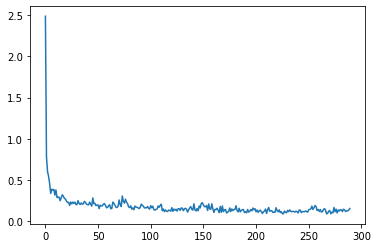

In [8]:
lr = 0.01

y_train = np.reshape(y_train, (-1, 1))
y_test = np.reshape(y_test, (-1, 1))

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
mae_tab= baselineModels.tabnetreg(X_train,y_train,X_test,y_test,batch_size,n_features,n_target,n_epochs, lr)
sb.glue("TabNet MAE",mae_tab)
print("TabNet MAE",mae_tab)